## Functions

What if?
<li> We have thousand of datasets and do not want to make a plot for every single one
<li> We want to reuse the code in other different datasets or parts of the program
<li> We are collaborating with other people working in the same code
It is a bad idea:
<li> Commenting in and out lines in the plotting code
<li> Copy and paste chuncks of code here and there
<br>
<br>
That makes the code illegible, redundant and prone to errors. And impossible to share it with others.
<br>

### The Solution: Package and reuse code as functions

Functions are wraps of code that make a particular usually repetitive (not always though) subtask in the main task of the program. They are pretty similar to methods in the sense that they
make an action and need to be fed by parameters. The main difference is that functions are not associated to a particular variable kind.<br>
The fist example converts temperatures from Fahrenheit to Kelvin:

In [1]:
#Building a function to convert fahr_to_kelvin: This is a repetitive tedious task

def fahr_to_kelvin(temp): # this first line is the definition of the function
    return ((temp -32) * (5/9)) + 273.15 # this is the body, in this case made of a single line

<img src="https://scw-ss.github.io/python-novice-inflammation-2016-06-27-cfmehu/fig/python-function.svg">

<ul>
<li> Definition of the function contains the name and the parameters needed by it to do its job</li>
<li> Body is the part that is compiled and has the instructions to make the task done</li>
<li> Return statement returns the result of the compilation of the function's body</li>
</ul>

### Calling the function

Just call the name 

In [22]:
print('freezing point of water:', fahr_to_kelvin(32))
print('boiling point of water:', fahr_to_kelvin(212))

freezing point of water: 273.15
boiling point of water: 373.15


## Composing functions 

We make now a function to convert Kelvin to Celsius:

In [23]:
def kelvin_to_celsius(temp_k):
    return temp_k - 273.15

print('absolute zero in Celsius:', kelvin_to_celsius(0.0))

absolute zero in Celsius: -273.15


What about Farh to Celsius? One of the main proposes of functions is reusability. So let's reuse one of them to build some "neat" code:

In [24]:
#Fahrenheit to Celsios. We can reuse the function f->k instead of copypasting the code

def fahr_to_celsius(temp_f):
    return kelvin_to_celsius(fahr_to_kelvin(temp_f))
print ('freezing point of water in Celsius:', fahr_to_celsius(32.0))

freezing point of water in Celsius: 0.0


## Tidying up

We now make to functions to wrap the code and make the analysis of our inflammation data easier to read and reuse:
<br>
First we create a function to plot the data by feeding a filename

In [25]:
#First function: Makes avg,max,min plots of a file. Note: No return or void function

def analyze(filename):
    data = numpy.loadtxt(fname=filename, delimiter=',')

    fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)

    axes1.set_ylabel('average')
    axes1.plot(data.mean(axis=0))

    axes2.set_ylabel('max')
    axes2.plot(data.max(axis=0))

    axes3.set_ylabel('min')
    axes3.plot(data.min(axis=0))

    fig.tight_layout()
    matplotlib.pyplot.show()

Second we build a function that detects anomalies in the data. Also needs a filename as parameter

In [26]:
# Second function: Find anomalies in a file. Again void function

def detect_problems(filename):

    data = numpy.loadtxt(fname=filename, delimiter=',')

    if data.max(axis=0)[0] == 0 and data.max(axis=0)[20] == 20:
        print('Suspicious looking maxima!')
    elif data.min(axis=0).sum() == 0:
        print('Minima add up to zero!')
    else:
        print('Seems OK!')

Now we use them (Do not forget to import numpy and matplotlib.pyplot because they are needed by the code)

inflammation-02.csv


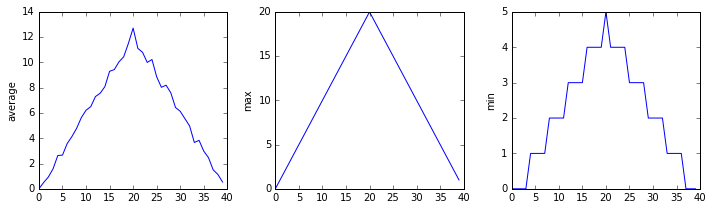

Suspicious looking maxima!
------------------------------------


inflammation-09.csv


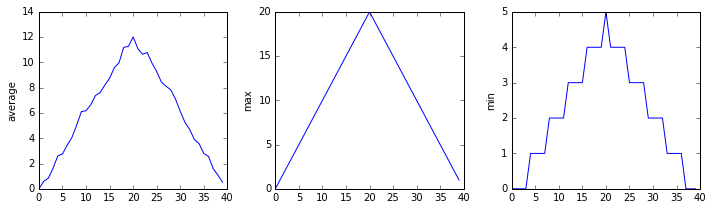

Suspicious looking maxima!
------------------------------------


inflammation-01.csv


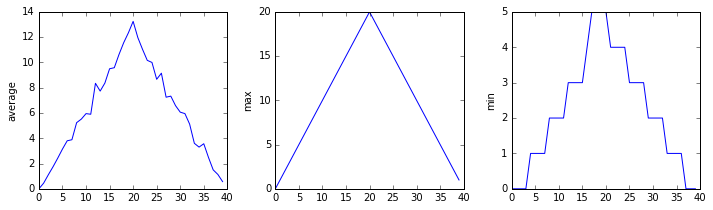

Suspicious looking maxima!
------------------------------------




In [27]:
%matplotlib inline
import numpy
import matplotlib.pyplot
import glob

filenames = glob.glob('inflammation-*.csv')

for f in filenames[:3]:
    print(f)
    analyze(f)
    detect_problems(f)
    print('------------------------------------\n\n')

## Testing and Documenting 

When using functions we need to test they are working as expected. By following the example we will see how it is

In [28]:
# This function takes data and center them around certain desired value
def center(data, desired):
    return (data - data.mean()) + desired

To test the function we used controlled data instead real one:

In [29]:
z = numpy.zeros((2,2)) # We create a 2x2 0's matrix
print(center(z,3))

[[ 3.  3.]
 [ 3.  3.]]


Looks great. Let's center the real data:

In [30]:
data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')
print(center(data,0))

[[-6.14875 -6.14875 -5.14875 ..., -3.14875 -6.14875 -6.14875]
 [-6.14875 -5.14875 -4.14875 ..., -5.14875 -6.14875 -5.14875]
 [-6.14875 -5.14875 -5.14875 ..., -4.14875 -5.14875 -5.14875]
 ..., 
 [-6.14875 -5.14875 -5.14875 ..., -5.14875 -5.14875 -5.14875]
 [-6.14875 -6.14875 -6.14875 ..., -6.14875 -4.14875 -6.14875]
 [-6.14875 -6.14875 -5.14875 ..., -5.14875 -5.14875 -6.14875]]


We can make further tests to see if results are correct:

In [31]:
print('original min, mean, and max are:', data.min(), data.mean(), data.max())
centered = center(data, 0)
print('min, mean, and and max of centered data are:', centered.min(), centered.mean(), centered.max())

original min, mean, and max are: 0.0 6.14875 20.0
min, mean, and and max of centered data are: -6.14875 2.84217094304e-16 13.85125


In [32]:
#Test also the standar deviation is the same
print('std dev before and after:', data.std(), centered.std())

std dev before and after: 4.61383319712 4.61383319712


For better comparision we can make the difference between the two

In [33]:
print('difference in standard deviations before and after:', data.std() - centered.std())

difference in standard deviations before and after: 0.0


## Documentation

Is important to document each function to remember ourselves and let other know what the function does

In [34]:
#You can use this kind of comment but there is a better way

def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.''' 
    return (data - data.mean()) + desired

In [35]:
help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.



In [36]:
def center(data, desired):
    '''Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

help(center)

Help on function center in module __main__:

center(data, desired)
    Return a new array containing the original data centered around the desired value.
    Example: center([1, 2, 3], 0) => [-1, 0, 1]



## Defining Defaults 

Passing parameters to a function directly or by name:

In [37]:
type(data) #directly

numpy.ndarray

In [38]:
numpy.loadtxt(fname='inflammation-01.csv', delimiter=',') # Using names

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

In [39]:
numpy.loadtxt('inflammation-01.csv', delimiter=',') # Ommiting the fname

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  1.,  2., ...,  1.,  0.,  1.],
       [ 0.,  1.,  1., ...,  2.,  1.,  1.],
       ..., 
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  2.,  0.],
       [ 0.,  0.,  1., ...,  1.,  1.,  0.]])

In [40]:
numpy.loadtxt('inflammation-01.csv', ',') # Ommiting the delimiter

TypeError: data type "," not understood

To understand this we need to see how a parameter gets a default in its definition:

In [41]:
def center(data, desired=0.0):
    '''Return a new array containing the original data centered around the desired value (0 by default).
    Example: center([1, 2, 3], 0) => [-1, 0, 1]'''
    return (data - data.mean()) + desired

In [42]:
test_data = numpy.zeros((2, 2))
print(center(test_data, 3))

[[ 3.  3.]
 [ 3.  3.]]


We can ommit the desired value, in that case it takes the given default:

In [43]:
more_data = 5 + numpy.zeros((2, 2))
print('data before centering:')
print(more_data)
print('centered data:')
print(center(more_data))

data before centering:
[[ 5.  5.]
 [ 5.  5.]]
centered data:
[[ 0.  0.]
 [ 0.  0.]]


Arguments are matched from left to right:

In [44]:
def display(a=1, b=2, c=3):
    print('a:', a, 'b:', b, 'c:', c)

print('no parameters:')
display()
print('one parameter:')
display(55)
print('two parameters:')
display(55, 66)

no parameters:
a: 1 b: 2 c: 3
one parameter:
a: 55 b: 2 c: 3
two parameters:
a: 55 b: 66 c: 3


Having this in mind. Let's take a look to numpy.loadtxt() function 

In [45]:
help(numpy.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file or str
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence, optional
        The characters or list of characters us

We see that:
<ul>
<li> fname must be provided because it do not have any defaults
<li> Given no name to the parameter makes the assumption that it is the only non-default parameter
<li> No ambiguity in fact when providing numpy.loadtxt('inflammation-01.csv', delimiter=',')
</ul>
<br>
However when giving numpy.loadtxt('inflammation-01.csv', ',')
<ul>
<li> 'inflammation-01.csv' is again assigned to fname
<li> But ',' is assigned to the next parameter to the right, which is in this case dtype
<li> Since ',' is not a valid dtype it gives an error
<li> So we either give a dtype paramiter in between 'inflammation-01.csv' and ',' or better specify the name of
the parameter
</ul>


## Exercises

## Combining strings

In [46]:
def fence(word, wrapper):
    return wrapper + word + wrapper
print(fence('andres','*'))

*andres*


### Selecting characters from strings

In [47]:
def outer(word):
    return word[0] + word[-1]
print(outer('andres'))

as


### Rescaling an array

In [48]:
def rescale(data_orig):
    max = data_orig.max()
    min = data_orig.min()
    return (data_orig - min)/(max - min)
data = numpy.loadtxt('inflammation-01.csv', delimiter=',')
print(rescale(data))

[[ 0.    0.    0.05 ...,  0.15  0.    0.  ]
 [ 0.    0.05  0.1  ...,  0.05  0.    0.05]
 [ 0.    0.05  0.05 ...,  0.1   0.05  0.05]
 ..., 
 [ 0.    0.05  0.05 ...,  0.05  0.05  0.05]
 [ 0.    0.    0.   ...,  0.    0.1   0.  ]
 [ 0.    0.    0.05 ...,  0.05  0.05  0.  ]]


### Testing and documenting your function

In [49]:
help(numpy.arange)

Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and

In [50]:
help(numpy.linspace) 

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [51]:
data = numpy.linspace(10, 30, 30)
print('original data :', data)
print('rescaled data :', rescale(data))

original data : [ 10.          10.68965517  11.37931034  12.06896552  12.75862069
  13.44827586  14.13793103  14.82758621  15.51724138  16.20689655
  16.89655172  17.5862069   18.27586207  18.96551724  19.65517241
  20.34482759  21.03448276  21.72413793  22.4137931   23.10344828
  23.79310345  24.48275862  25.17241379  25.86206897  26.55172414
  27.24137931  27.93103448  28.62068966  29.31034483  30.        ]
rescaled data : [ 0.          0.03448276  0.06896552  0.10344828  0.13793103  0.17241379
  0.20689655  0.24137931  0.27586207  0.31034483  0.34482759  0.37931034
  0.4137931   0.44827586  0.48275862  0.51724138  0.55172414  0.5862069
  0.62068966  0.65517241  0.68965517  0.72413793  0.75862069  0.79310345
  0.82758621  0.86206897  0.89655172  0.93103448  0.96551724  1.        ]


Adding docstrings:

In [52]:
def rescale(data_orig):
    '''Returns a rescaled array from the original data_orig, in interval [0:1]'''
    max = data_orig.max()
    min = data_orig.min()
    return (data_orig - min)/(max - min)

In [53]:
help(rescale)

Help on function rescale in module __main__:

rescale(data_orig)
    Returns a rescaled array from the original data_orig, in interval [0:1]



### Variables inside and outside functions

In [54]:
f = 0
k = 0

def f2k(f):
  k = ((f-32)*(5.0/9.0)) + 273.15
  return k

f2k(8)
f2k(41)
f2k(32)

print(k)

0


### Mixing Default and Non-Default Parameters

In [58]:
def numbers(one, two=2, three, four=4):
    n = str(one) + str(two) + str(three) + str(four)
    return n

print(numbers(one = 1, two =1,  three= 3, four = 1))

SyntaxError: non-default argument follows default argument (<ipython-input-58-f9eb1e4dd333>, line 1)

#### All required parameters must be placed before any default arguments. Simply because they are mandatory, whereas default arguments are not. Syntactically, it would be impossible for the interpreter to decide which values match which arguments if mixed modes were allowed. A SyntaxError is raised if the arguments are not given in the correct order:

In [1]:
def func(a, b = 3, c = 6):
  print('a: ', a, 'b: ', b,'c:', c)

func(-1, 2)

a:  -1 b:  2 c: 6
